<a href="https://colab.research.google.com/github/SohaliBaisla/Hindi-Fake-News-Fact-Checker/blob/main/acm_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
!pip install inltk
from inltk.inltk import setup
#setup('hi')

In [ ]:
from inltk.inltk import tokenize



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acm_dataset.csv to acm_dataset.csv


In [ ]:
df=pd.read_csv("acm_dataset.csv")
df.columns =['heading', 'text', 'link','output']
df=df.drop(['heading','link'], axis = 1)

In [ ]:
df

,text,output
0,इसी हैशटैग के साथ एक तस्वीर भी शेयर की जा रही ...,1.0
1,इसी हैशटैग के साथ एक तस्वीर भी शेयर की जा रही ...,1.0
2,इसी हैशटैग के साथ एक तस्वीर भी शेयर की जा रही ...,1.0
3,तस्वीर को रिवर्स सर्च करने पर हमें 'जागरण' की ...,0.0
4,इस मामले पर उस समय कई और https://hindi.news18....,0.0
...,...,...
1593,टिनआय (TinEye) पर रिवर्स इमेज सर्च करने पर हमन...,0.0
1594,\n\n,0.0
1595,https://www.amarujala.com/photo-gallery/delhi-...,0.0
1596,https://www.ngofoundation.in/ngo-directory/div...,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import numpy as np


stopword = ['','.','!','?', 'अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा' ,'दे', 'देकर' ,'रह', 'कह' , 'कर' , 'कहा', 'बात' , 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह' , 'मेरे' , 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', 'इतयादि','यहाँ', 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग','बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', 'जा','बनि', 'हें', 'यिह ', 'उन', 'को', 'तिन्हों', 'उन्होंने', 'तुझे', 'उसे', 'होने', 'इन्हीं', 'थे', 'उंहिं', 'अपने', 'में', 'फिर','यही', 'नीचे', 'होती', 'तिसे', 'हम', 'यदि', 'सारा', 'कर', 'सकते', 'कोइ', 'और', 'जिंहों', 'तिंहें', 'दूसरे', 'जब', 'रहे','अत', 'मानो', 'जिन', 'बाद', 'उनका', 'किया', 'या', 'उनकी', 'कौन', 'ऐसा', 'सबसे', 'अनुसार', 'दुसरे', 'इन', 'अदि','जिसे', 'उसकी', 'इत्यादि', 'करना', 'यहां', 'हुए', 'तेरा', 'आदि', 'पर  ', 'वाले', 'कहता', 'किन्हों', 'किसे', 'जिन्हें', 'मे','होता', 'करने', 'साभ', 'अभि', 'उसको', 'कई', 'बनी', 'के', 'इन्हें', 'वहाँ', 'कोनसा', 'कइ', 'इनका', 'थि', 'बाला','ऱ्वासा', 'हो', 'उंहें', 'दुसरा', 'वे', 'भितर', 'जेसे', 'एवं', 'अंदर', 'दो', 'साथ', 'करें', 'जिधर', 'तरह', 'उसि', 'इस', 'एसे', 'तिन', 'नहीं', 'से','न','उनको', 'किस', 'किसी', 'इसी', 'मैं', 'यह', 'हुइ', 'ले', 'कि', 'की', 'इसलिये', 'रवासा', 'ने', 'जैसा', 'वह ', 'तिन्हें', 'वुह', 'उस', 'उंहों', 'वगेरह', 'उसके', 'मुझे', 'करते', 'जितना', 'जहां', 'इन्हों', 'इसके', 'होना', 'इसका', 'इंहिं', 'एक', 'जो', 'पे', 'ही', 'तो', 'थी', 'रखें', 'इसे', 'इन ', 'के', 'बहि', 'पुरा', 'ओर', 'इसकी']
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
lr = LogisticRegression()
#Makes multiclassifier to binary
ovr=OneVsRestClassifier(lr)
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.1)
#words = [word for word in text.split() if word.lower() not in sw_spacy]
#new_text = " ".join(words)
x_tr=[]
for i in x_train['text'].astype(str):
  print(i)
  #words = [word for word in text.split() if word.lower() not in sw_nltk]
  x_tr.append(i)
x_ts=[]
for i in x_test['text'].astype(str):
  x_ts.append(i)
x_ts
y_train=x_train['output']

y_test=x_test['output']
print(x_tr)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
#learn vocabulary and return document-term matrix
x_train=vectorizer.fit_transform(x_tr)
#transform document to document term matrix
x_test=vectorizer.transform(x_ts)
'''
y_test=[]
for i in y_test2:
  if i==0:
    y_test.append([1,0])
  else:
    y_test.append([0,1])
print(y_test)
import numpy
y_test=numpy.asarray(y_test)
y_test.shape
y_train=[]
for i in y_train2:
  if i==0:
    y_train.append([1,0])
  else:
    y_train.append([0,1])
print(y_train)
import numpy
y_train=numpy.asarray(y_train)
y_train.shape
'''

['https://bit.ly/2RirhC3 target=_blankटीवी9 भारतवर्ष की एक रिपोर्ट के मुताबिक, 10 अप्रैल शनिवार को दिल्ली में रोहिणी के बुद्ध विहार में एक पति ने अवैध संबंध के शक के चलते अपनी पत्नी की दिनदहाड़े चाकू गोदकर हत्या कर दी. पुलिस के मुताबिक, हमला करने वाले युवक का नाम हरीश मेहता है और मृतक युवती का नाम नीलू मेहता है.', 'इस वीडियो को https://www.facebook.com/ambrish.jain.73/videos/539497764161911फेसबुक  और https://twitter.com/007QaQa/status/1409620222881918980?s=20ट्विटर  पर अलग-अलग कैप्शन के साथ जमकर शेयर किया जा रहा है. इसी वीडियो को स्पोक्समैन नाम के एक वेरीफाइड फेसबुक पेज से भी रिपोर्ट बनाकर https://www.facebook.com/1429635690609868/videos/603533987703851शेयर किया गया है.', 'कृषि कानूनों के विरोध के चलते किसानों ने कहा है कि अगर सरकार उनकी मांगें नहीं मानती है तो वे 26 जनवरी को दिल्ली में ट्रैक्टर परेड निकालेंगे. किसानों ने https://indianexpress.com/article/india/talks-stuck-tractor-rally-jan-7-r-day-rehearsal-say-farmers-7134338/ऐलान किया\xa0है कि इस परेड के लिए वे आज 7 जनवरी को रिहर्सल

'\ny_test=[]\nfor i in y_test2:\n  if i==0:\n    y_test.append([1,0])\n  else:\n    y_test.append([0,1])\nprint(y_test)\nimport numpy\ny_test=numpy.asarray(y_test)\ny_test.shape\ny_train=[]\nfor i in y_train2:\n  if i==0:\n    y_train.append([1,0])\n  else:\n    y_train.append([0,1])\nprint(y_train)\nimport numpy\ny_train=numpy.asarray(y_train)\ny_train.shape\n'

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#Initializing the classifier Network
x_test = x_test.toarray()
x_train = x_train.toarray()
#y_test = y_test.toarray()
#y_train = y_train.toarray()
#model
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100
model = Sequential()
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Embedding
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,callbacks=[EarlyStopping(monitor='accuracy', patience=3, min_delta=0.0001)])
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Epoch 1/10
22/22 [==============================] - 476s 21s/step - loss: 0.0000e+00 - accuracy: 0.5856
Epoch 2/10
22/22 [==============================] - 470s 21s/step - loss: 0.0000e+00 - accuracy: 0.5913
Epoch 3/10
22/22 [==============================] - 474s 22s/step - loss: 0.0000e+00 - accuracy: 0.5913
Epoch 4/10
17/22 [======================>.......] - ETA: 1:48 - loss: 0.0000e+00 - accuracy: 0.5818

In [ ]:
x_tr=[]
for i in x_train['text'].astype(str):
  x_tr.append(i)
x_ts=[]
for i in x_test['text'].astype(str):
  x_ts.append(i)
x_ts
y_train=x_train['output']

y_test=x_test['output']
print(x_tr)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
#learn vocabulary and return document-term matrix
x_train=vectorizer.fit_transform(x_tr)
#transform document to document term matrix
x_test=vectorizer.transform(x_ts)
ovr.fit(x_train,y_train)
y_pred=ovr.predict(x_test)
accuracy=[]
from sklearn.metrics import accuracy_score
accuracy.append(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)
#gnb

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
ovr=OneVsRestClassifier(clf)
ovr.fit(x_train.todense(),y_train)
y_pred=ovr.predict(x_test.todense())
accuracy.append(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
ovr=OneVsRestClassifier(clf)
ovr.fit(x_train.todense(),y_train)
y_pred=ovr.predict(x_test.todense())
accuracy.append(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=30, random_state=0)
ovr=OneVsRestClassifier(clf)
ovr.fit(x_train.todense(),y_train)
y_pred=ovr.predict(x_test.todense())
accuracy.append(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)
from sklearn import svm
clf = svm.SVC()

ovr=OneVsRestClassifier(clf)
ovr.fit(x_train.todense(),y_train)
y_pred=ovr.predict(x_test.todense())
accuracy.append(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)

['https://www.aajtak.in/fact-check/story/fact-check-of-jamia-protest-reality-of-abvp-worker-wearing-police-jacket-and-helmet-993383-2019-12-17उस वक्त AFWA\xa0ने इसकी पुष्टि\u200d के लिए दिल्ली पुलिस के जनसंपर्क अधिकारी और डीसीपी एमएस रंधावा से बात भी की थी.', 'सोशल मीडिया पर इस\xa0https://www.facebook.com/groups/338095106632087/permalink/1199264803848442<bतस्वीर को शेयर करते हुए लोग</b\xa0कैप्शन में लिख रहे हैं, साबुन शैंपू से नहाने के बाद भी #योगी के गार्ड अछूतों को कंधे से पकड कर खडे है।ताकि कोई अछूत खडा होकर योगी को #छू न ले।और आप कहते है जातिवाद खत्म हो गया! यह\xa0https://www.facebook.com/photo?fbid=1803193906661968&amp;set=a.1703882306593129<bभ्रामक पोस्ट\xa0</bपिछले चार सालों से वायरल हो रही है. इस समय भी\xa0https://bit.ly/3uThUH1<bफेसबुक</b\xa0और\xa0https://twitter.com/ParisanghWB/status/1400410942882467847<bट्विटर</b\xa0पर कई यूजर इस पोस्ट को साझा कर रहे हैं. पोस्ट का आर्काइव\xa0<bhttps://archive.ph/wip/G9bJLयहां\xa0</bदेखा जा सकता है', 'तस्वीर को सोशल मीडिया पर पोस्ट करते हुए 

0.7875399361022364

In [ ]:
accuracy

[0.7747603833865815,
 0.7795527156549521,
 0.46645367412140576,
 0.8003194888178914,
 0.7939297124600639]

{'Logistic Regression': 0.7747603833865815, ' GaussianNB': 0.7795527156549521, 'KNN': 0.46645367412140576, 'Random Forest': 0.8003194888178914, 'SVM': 0.7939297124600639}


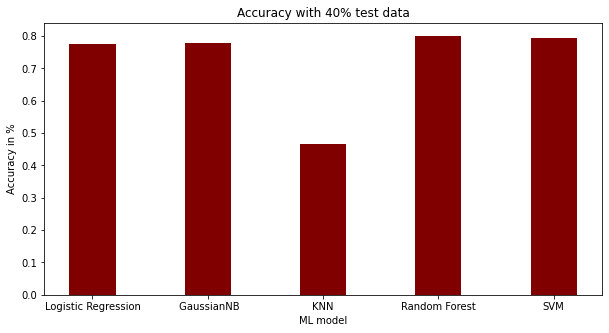

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = dict()
algo=["Logistic Regression"," GaussianNB","KNN","Random Forest","SVM"]
for i in range(5):
  data[algo[i]]=accuracy[i]
print(data)
name = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(name, values, color ='maroon',
		width = 0.4)

plt.ylabel("Accuracy in %")
plt.xlabel("ML model")
plt.title("Accuracy with 40% test data")
plt.show()
